In [461]:
import pandas as pd

In [462]:
from pathlib import Path

In [463]:
in_dir = Path('/Users/danve/Downloads/logs-10/')

In [465]:
logs = []

for f in in_dir.iterdir():
    try:
        this_log = pd.read_csv(f)
    except:
        print(f)

    if '12-12_04-48' not in f.name:
       continue

    logs.append(this_log)

/Users/danve/Downloads/logs-10/step_log_2023-12-10_05-43.csv


In [466]:
all_logs = pd.concat(logs)

In [467]:
all_logs.loc[all_logs['Cell Index'] == 740]

,Episode,Total Reward,Epsilon,Cell Index,Action Type,Reward,Energy Output,Unmet Demand
241,NaN,NaN,NaN,740.0,wind,3999.0,46310691.0,24916976.0
145,NaN,NaN,NaN,740.0,wind,3682.0,26471406.0,32476735.0
82,NaN,NaN,NaN,740.0,wind,6263.0,18214365.0,38973134.0
172,NaN,NaN,NaN,740.0,wind,3500.0,32439794.0,30234650.0
113,NaN,NaN,NaN,740.0,wind,4246.0,24574564.0,33514973.0
40,NaN,NaN,NaN,740.0,wind,5522.0,6496468.0,50691031.0
290,NaN,NaN,NaN,740.0,wind,4453.0,54771433.0,21495421.0
34,NaN,NaN,NaN,740.0,wind,5522.0,5580932.0,51606567.0
124,NaN,NaN,NaN,740.0,wind,4206.0,25690182.0,32818305.0


In [468]:
all_logs['Unmet Demand'].min()

19628691.0

In [469]:
all_logs = all_logs.reset_index()

In [470]:
all_logs['Unmet Demand'].argmin()

22968

In [471]:
all_logs['Epsilon'] = all_logs['Epsilon'].bfill()
all_logs['Episode'] = all_logs['Episode'].bfill()
all_logs['Total Reward'] = all_logs['Total Reward'].bfill()

In [472]:
all_logs = all_logs.sort_values(by=['Episode', 'index'], ascending=[True, True])
all_logs

,index,Episode,Total Reward,Epsilon,Cell Index,Action Type,Reward,Energy Output,Unmet Demand
627,0,1.0,6.145741e+06,0.960000,1666.0,wind,12558.0,75749.0,57111750.0
628,1,1.0,6.145741e+06,0.960000,1240.0,wind,11975.0,145760.0,57041739.0
629,2,1.0,6.145741e+06,0.960000,66.0,wind,1812.0,171795.0,57015704.0
630,3,1.0,6.145741e+06,0.960000,1560.0,wind,6332.0,216156.0,56971343.0
631,4,1.0,6.145741e+06,0.960000,314.0,solar,103687.0,745971.0,56441528.0
...,...,...,...,...,...,...,...,...,...
19179,284,89.0,6.090698e+06,0.026433,1483.0,wind,470.0,55875770.0,21329638.0
19180,285,89.0,6.090698e+06,0.026433,1260.0,solar,24174.0,56413565.0,21165078.0
19181,286,89.0,6.090698e+06,0.026433,185.0,solar,16337.0,56904430.0,21036391.0
19182,287,89.0,6.090698e+06,0.026433,501.0,solar,19893.0,57425030.0,20891289.0


In [473]:
res = all_logs.groupby(by='Episode').agg({'Total Reward': 'max', 'Unmet Demand': 'min', 
                                         'Epsilon': 'first'})

In [474]:
res['rolling_mean_reward'] = res['Total Reward'].rolling(5).mean()
res['rolling_mean_unmet'] = res['Unmet Demand'].rolling(5).mean()

In [475]:
res

,Total Reward,Unmet Demand,Epsilon,rolling_mean_reward,rolling_mean_unmet
Episode,,,,,
1.0,6.145741e+06,20145196.0,0.960000,NaN,NaN
2.0,6.181740e+06,20173857.0,0.921600,NaN,NaN
3.0,6.094737e+06,20509009.0,0.884736,NaN,NaN
4.0,6.111319e+06,21092370.0,0.849347,NaN,NaN
5.0,6.192228e+06,20083638.0,0.815373,6.145153e+06,20400814.0
...,...,...,...,...,...
85.0,6.096654e+06,20804430.0,0.031121,6.091097e+06,20718156.2
86.0,6.107352e+06,20720872.0,0.029876,6.090163e+06,20749132.6
87.0,6.293884e+06,19824763.0,0.028681,6.155237e+06,20389478.8


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


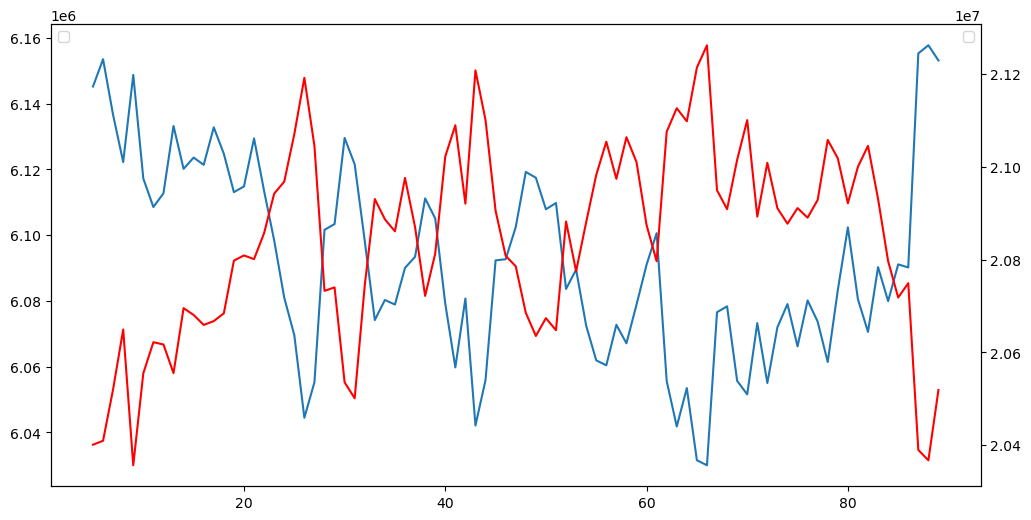

In [476]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
ax2 = ax.twinx()

#ax.plot(res['Total Reward'], label='reward', alpha=0.7, linewidth=1.5,)
ax.plot(res['rolling_mean_reward'], label=None, linewidth=1.5, color='C0')
#ax2.plot(res['Unmet Demand'], color='red', label='unmet demand', alpha=0.7, linewidth=1.5)
ax2.plot(res['rolling_mean_unmet'], label=None, linewidth=1.5, color='red')

ax.legend(loc='upper left')
ax2.legend(loc='upper right')

In [477]:
res.index.values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78.,
       79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89.])

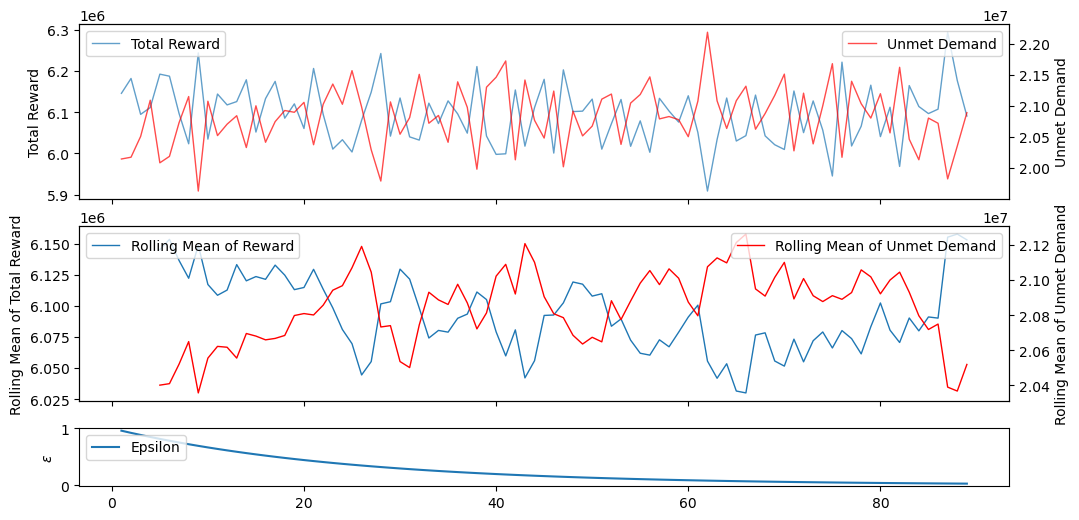

In [478]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 6), gridspec_kw={'height_ratios': [3, 3, 1]}, sharex=True)

ax_flat = ax.flatten()

ax0_0 = ax_flat[0]
ax0_1 = ax0_0.twinx()
ax1_0 = ax_flat[1]
ax1_1 = ax1_0.twinx()
ax2_0 = ax_flat[2]

ax0_0.plot(res.index.values, res['Total Reward'], label='Total Reward', alpha=0.7, linewidth=1)
ax0_1.plot(res.index.values, res['Unmet Demand'], color='red', label='Unmet Demand', alpha=0.7, linewidth=1)
ax0_0.set_ylabel('Total Reward')
ax0_1.set_ylabel('Unmet Demand')
ax0_0.legend(loc='upper left')
ax0_1.legend(loc='upper right')

ax1_0.plot(res.index.values, res['rolling_mean_reward'], linewidth=1, label='Rolling Mean of Reward')
ax1_1.plot(res.index.values, res['rolling_mean_unmet'], linewidth=1, color='red', label='Rolling Mean of Unmet Demand')
ax1_0.set_ylabel('Rolling Mean of Total Reward')
ax1_1.set_ylabel('Rolling Mean of Unmet Demand')
ax1_0.legend(loc='upper left')
ax1_1.legend(loc='upper right')

ax2_0.plot(res.index.values, res['Epsilon'], label='Epsilon')
ax2_0.set_ylabel('$\epsilon$')
ax2_0.legend(loc='upper left')

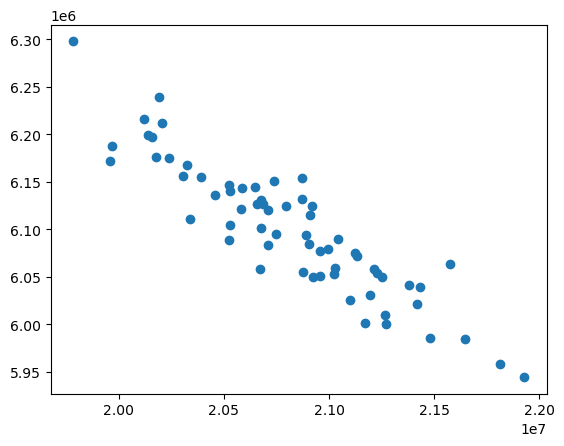

In [446]:
%matplotlib inline



plt.scatter(best_unmet, rewards)

In [447]:
(all_logs.groupby(by=['Episode', 'Cell Index']).size().sort_values() == 2).sum()

47

In [448]:
(all_logs.groupby(by=['Episode', 'Cell Index']).size().sort_values() == 1).sum()

28442

In [449]:
all_logs.groupby(by='Cell Index').size().quantile(0.95)

22.0

In [450]:
choice_groups = all_logs.groupby(by='Cell Index').agg({'index': 'count', 'Reward': 'mean'})
choice_groups = choice_groups.rename(columns={'index': 'n_times_chosen', 'Reward': 'mean_reward'})
choice_groups

,n_times_chosen,mean_reward
Cell Index,,
0.0,19,44986.578947
1.0,14,41813.000000
2.0,20,27075.000000
3.0,26,19285.653846
4.0,9,5610.777778
...,...,...
2309.0,9,496.555556
2310.0,19,-2845.210526
2311.0,14,26496.785714


In [451]:
all_logs['Episode'].max()

96.0

In [452]:
choice_groups.groupby(by='n_times_chosen')['mean_reward'].mean()

n_times_chosen
2      9541.500000
3      6116.755556
4      5499.855263
5      6559.365333
6      6666.619048
7      6326.782403
8      6939.552746
9      6776.114379
10     8312.367500
11    11274.733818
12    13940.299883
13    18651.588394
14    24133.296000
15    25710.487591
16    25752.405000
17    27739.047160
18    29511.269097
19    29637.782895
20    30802.029452
21    30223.294931
22    29292.791322
23    28452.972625
24    29840.192460
25    26371.726154
26    29164.410256
27    32345.876543
28    31490.357143
29    31723.155172
96     5522.000000
Name: mean_reward, dtype: float64

In [453]:
choice_groups.loc[choice_groups['n_times_chosen'] == 29]

,n_times_chosen,mean_reward
Cell Index,,
981.0,29,25859.758621
1859.0,29,37586.551724


In [454]:
all_logs.loc[all_logs['Cell Index'] == 1859].sort_values(by='Episode')

,index,Episode,Total Reward,Epsilon,Cell Index,Action Type,Reward,Energy Output,Unmet Demand
10143,46,3.0,6.101146e+06,0.898632,1859.0,wind,12968.0,10229690.0,46957809.0
7721,290,6.0,6.052575e+06,0.807540,1859.0,solar,26477.0,57279667.0,21024781.0
20418,38,10.0,6.058053e+06,0.700282,1859.0,wind,12968.0,7755198.0,49432301.0
31,31,13.0,6.136442e+06,0.629296,1859.0,wind,12968.0,5443501.0,51743998.0
1968,140,15.0,6.076801e+06,0.586016,1859.0,wind,8677.0,27185466.0,32068109.0
2973,231,16.0,6.130606e+06,0.565506,1859.0,wind,8677.0,41677861.0,26269538.0
3394,70,17.0,6.155315e+06,0.545713,1859.0,wind,12968.0,9885622.0,47301877.0
27840,78,23.0,6.038960e+06,0.440685,1859.0,solar,108284.0,17776059.0,39411440.0
25097,256,25.0,6.049850e+06,0.410377,1859.0,wind,8677.0,48114204.0,24203958.0
23824,174,28.0,6.090432e+06,0.368778,1859.0,wind,8677.0,35334197.0,29108314.0


In [455]:
choice_groups.loc[choice_groups['n_times_chosen'] == 12]

,n_times_chosen,mean_reward
Cell Index,,
26.0,12,9717.500000
32.0,12,21969.166667
49.0,12,32072.250000
62.0,12,36257.666667
124.0,12,32316.666667
...,...,...
2258.0,12,20737.333333
2260.0,12,-1595.833333
2273.0,12,4237.166667


In [456]:
action_type_agg_count = all_logs.groupby(by=['Episode', 'Action Type']).size()
action_type_agg_count.name = 'count'
action_type_agg_count = action_type_agg_count.reset_index()

unmet_demand = all_logs.groupby(by='Episode').agg({'Unmet Demand': 'min'})
total_reward = all_logs.groupby(by='Episode').agg({'Total Reward': 'last'})

action_type_agg_count = action_type_agg_count.merge(unmet_demand, on='Episode', how='left')
action_type_agg_count = action_type_agg_count.merge(total_reward, on='Episode', how='left')

Text(0, 0.5, 'Unmet Demand at End of Episode')

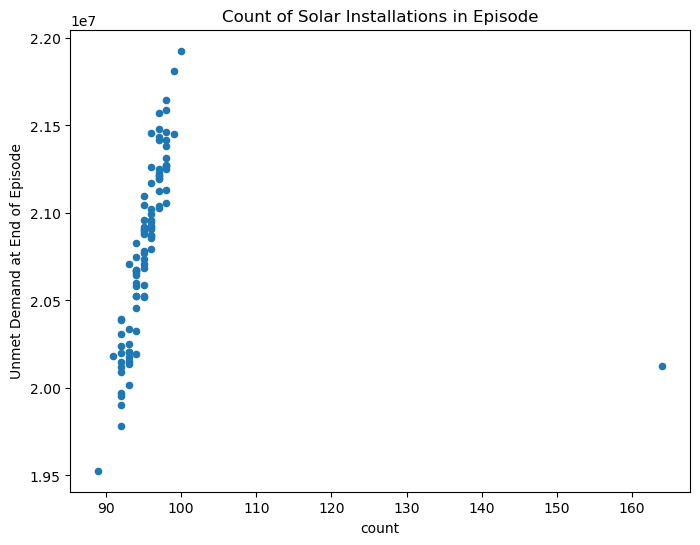

In [457]:
fig, ax = plt.subplots(figsize=(8, 6))

action_type_agg_count.loc[action_type_agg_count['Action Type'] == 'solar'].plot.scatter('count', 'Unmet Demand', title='Count of Solar Installations in Episode', ax=ax)

ax.set_ylabel('Unmet Demand at End of Episode')

Text(0, 0.5, 'Total Reward at End of Episode')

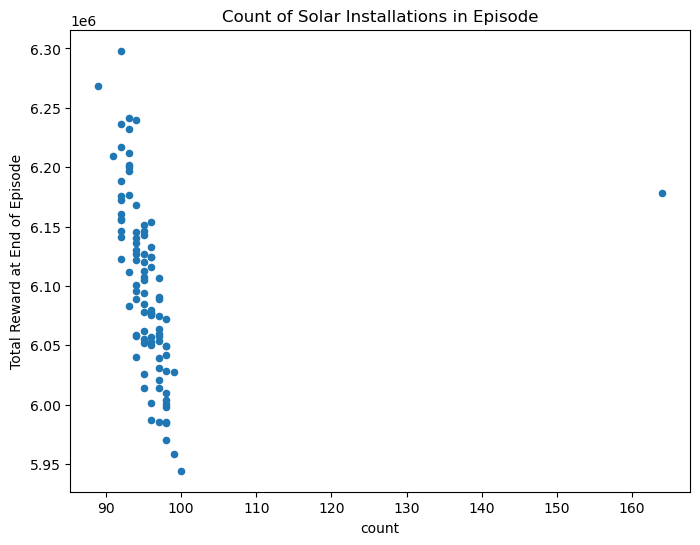

In [458]:
fig, ax = plt.subplots(figsize=(8, 6))

action_type_agg_count.loc[action_type_agg_count['Action Type'] == 'solar'].plot.scatter('count', 'Total Reward', title='Count of Solar Installations in Episode', ax=ax)

ax.set_ylabel('Total Reward at End of Episode')

In [459]:
action_type_agg_count.sort_values(by='Unmet Demand')

,Episode,Action Type,count,Unmet Demand,Total Reward
173,87.0,wind,249,19526842.0,6.268272e+06
172,87.0,solar,89,19526842.0,6.268272e+06
69,35.0,wind,216,19783755.0,6.298086e+06
68,35.0,solar,92,19783755.0,6.298086e+06
162,82.0,solar,92,19903210.0,6.236073e+06
...,...,...,...,...,...
113,57.0,wind,170,21647775.0,5.984186e+06
103,52.0,wind,164,21811029.0,5.958187e+06
102,52.0,solar,99,21811029.0,5.958187e+06
106,54.0,solar,100,21927322.0,5.944281e+06


In [460]:
action_type_agg_count.sort_values(by='Episode')

,Episode,Action Type,count,Unmet Demand,Total Reward
0,1.0,solar,97,21211969.0,6.057848e+06
1,1.0,wind,179,21211969.0,6.057848e+06
2,2.0,solar,94,20746702.0,6.095515e+06
3,2.0,wind,207,20746702.0,6.095515e+06
4,3.0,solar,94,20675634.0,6.101146e+06
...,...,...,...,...,...
187,94.0,wind,214,20391549.0,6.160563e+06
188,95.0,solar,98,21316075.0,5.997967e+06
189,95.0,wind,183,21316075.0,5.997967e+06
190,96.0,solar,92,20091825.0,6.146480e+06
